### Advanced Prophet Models - Detecting Changes

This program builds on the previous activity, and begins with the following:

`prophet_prepare_train_data` & `analyze_model_results`

Reads in the CSV of hourly crypto trading data, conducts exploratory data analysis, and builds a forecast model using the Facebook Prophet package. With the model built, creates forecasts for future crypto prices and splits this forecast into various seasonal patterns.

**This program** continues the analysis of hourly crypto trading data, covering some advanced Prophet strategies for making forecasts, by detecting abrupt changes in the time-series trend.


# (These first steps are from the previous Activity and have already been completed)

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

### Read in the data to visualize, analyze, and forecast.

In [2]:
# Read csv file as DataFrame, with the first column as row index
data_path = Path("../Resources/bitcoin_hourly.csv")
df = pd.read_csv(data_path, index_col='date', infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop('volume', axis=1)

# Preview the dataset
df

close
date                         
2017-08-17 05:00:00   4315.32
2017-08-17 06:00:00   4324.35
2017-08-17 07:00:00   4349.99
2017-08-17 08:00:00   4360.69
2017-08-17 09:00:00   4444.00
...                       ...
2021-02-12 01:00:00  48477.50
2021-02-12 02:00:00  47935.66
2021-02-12 03:00:00  47587.31
2021-02-12 04:00:00  47271.55
2021-02-12 05:00:00  47398.79

[30748 rows x 1 columns]

In [3]:
# Use hvPlot to visually inspect the price data
df['close'].hvplot()

:Curve   [date]   (close)

In [4]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [5]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
# mercado_prophet_df = mercado_prophet_df.dropna()

# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

ds        y
0 2017-08-17 05:00:00  4315.32
1 2017-08-17 06:00:00  4324.35
2 2017-08-17 07:00:00  4349.99
3 2017-08-17 08:00:00  4360.69
4 2017-08-17 09:00:00  4444.00

ds         y
30743 2021-02-12 01:00:00  48477.50
30744 2021-02-12 02:00:00  47935.66
30745 2021-02-12 03:00:00  47587.31
30746 2021-02-12 04:00:00  47271.55
30747 2021-02-12 05:00:00  47398.79

### Fitting the Model

In [6]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [7]:
# Fit the time-series model.
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Making Model Predictions

In [8]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
future_trends.tail()

ds
31482 2021-03-25 17:00:00
31483 2021-03-25 18:00:00
31484 2021-03-25 19:00:00
31485 2021-03-25 20:00:00
31486 2021-03-25 21:00:00

In [9]:
future_trends

ds
0     2017-08-17 05:00:00
1     2017-08-17 06:00:00
2     2017-08-17 07:00:00
3     2017-08-17 08:00:00
4     2017-08-17 09:00:00
...                   ...
31482 2021-03-25 17:00:00
31483 2021-03-25 18:00:00
31484 2021-03-25 19:00:00
31485 2021-03-25 20:00:00
31486 2021-03-25 21:00:00

[31487 rows x 1 columns]

In [10]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0 2017-08-17 05:00:00  5744.792600  2953.654827  5579.507584  5744.792600   
1 2017-08-17 06:00:00  5751.499652  2919.914771  5595.198573  5751.499652   
2 2017-08-17 07:00:00  5758.206704  3003.203663  5662.976112  5758.206704   
3 2017-08-17 08:00:00  5764.913755  2882.025896  5772.872928  5764.913755   
4 2017-08-17 09:00:00  5771.620807  3000.163612  5563.981743  5771.620807   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  5744.792600    -1461.468052          -1461.468052          -1461.468052   
1  5751.499652    -1465.177830          -1465.177830          -1465.177830   
2  5758.206704    -1469.443698          -1469.443698          -1469.443698   
3  5764.913755    -1476.373838          -1476.373838          -1476.373838   
4  5771.620807    -1485.518803          -1485.518803          -1485.518803   

      daily  ...     weekly  weekly_lower  weekly_upper       yearly  \
0 -5.984690  ...  10.809065     10.809065     10.809065 -1466.292427   
1 -4.015305  ...  11.595956     11.595956     11.595956 -1472.758481   
2 -2.434314  ...  12.223625     12.223625     12.223625 -1479.233010   
3 -3.340513  ...  12.682643     12.682643     12.682643 -1485.715969   
4 -6.277418  ...  12.965927     12.965927     12.965927 -1492.207312   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -1466.292427  -1466.292427                   0.0   
1  -1472.758481  -1472.758481                   0.0   
2  -1479.233010  -1479.233010                   0.0   
3  -1485.715969  -1485.715969                   0.0   
4  -1492.207312  -1492.207312                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  4283.324549  
1                         0.0                         0.0  4286.321822  
2                         0.0                         0.0  4288.763005  
3                         0.0                         0.0  4288.539917  
4                         0.0                         0.0  4286.102004  

[5 rows x 22 columns]

### Plotting Forecasts

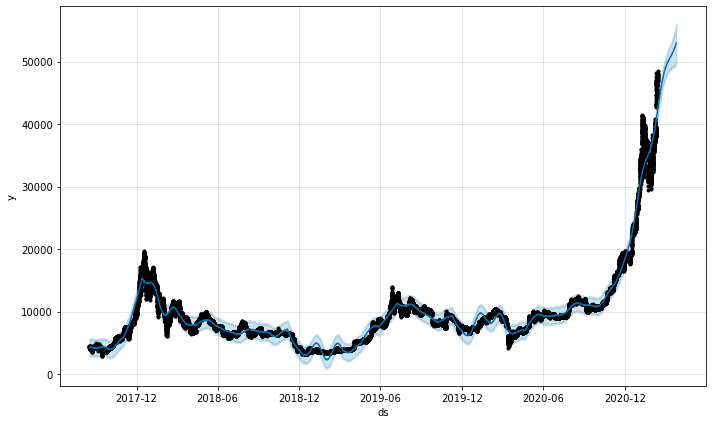

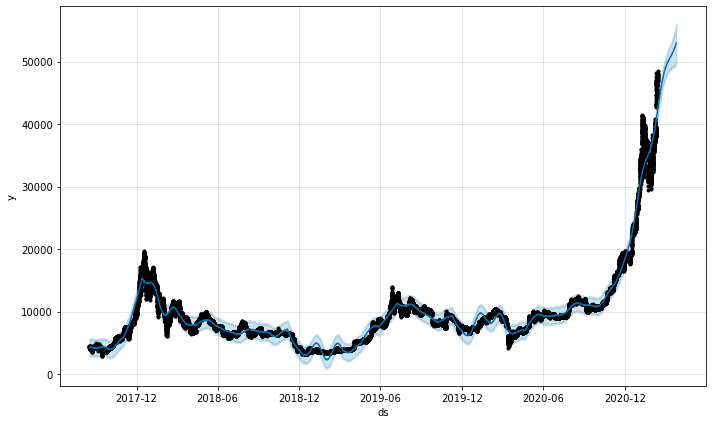

In [11]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_trends)

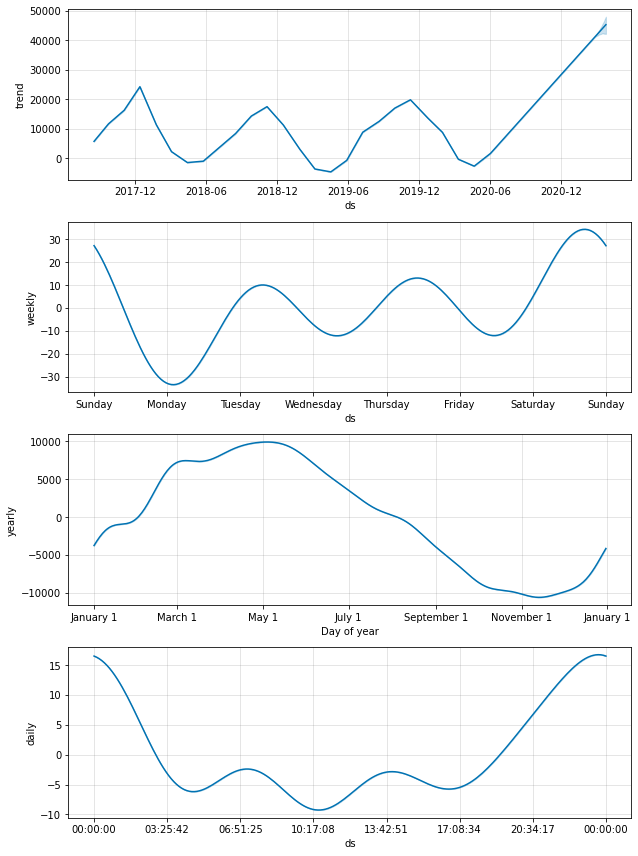

In [12]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_trends)

### Analyzing Forecasts

In [13]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()

trend   yhat_lower   yhat_upper  trend_lower  \
ds                                                                        
2017-08-17 05:00:00  5744.792600  2953.654827  5579.507584  5744.792600   
2017-08-17 06:00:00  5751.499652  2919.914771  5595.198573  5751.499652   
2017-08-17 07:00:00  5758.206704  3003.203663  5662.976112  5758.206704   
2017-08-17 08:00:00  5764.913755  2882.025896  5772.872928  5764.913755   
2017-08-17 09:00:00  5771.620807  3000.163612  5563.981743  5771.620807   

                     trend_upper  additive_terms  additive_terms_lower  \
ds                                                                       
2017-08-17 05:00:00  5744.792600    -1461.468052          -1461.468052   
2017-08-17 06:00:00  5751.499652    -1465.177830          -1465.177830   
2017-08-17 07:00:00  5758.206704    -1469.443698          -1469.443698   
2017-08-17 08:00:00  5764.913755    -1476.373838          -1476.373838   
2017-08-17 09:00:00  5771.620807    -1485.518803          -1485.518803   

                     additive_terms_upper     daily  daily_lower  ...  \
ds                                                                ...   
2017-08-17 05:00:00          -1461.468052 -5.984690    -5.984690  ...   
2017-08-17 06:00:00          -1465.177830 -4.015305    -4.015305  ...   
2017-08-17 07:00:00          -1469.443698 -2.434314    -2.434314  ...   
2017-08-17 08:00:00          -1476.373838 -3.340513    -3.340513  ...   
2017-08-17 09:00:00          -1485.518803 -6.277418    -6.277418  ...   

                        weekly  weekly_lower  weekly_upper       yearly  \
ds                                                                        
2017-08-17 05:00:00  10.809065     10.809065     10.809065 -1466.292427   
2017-08-17 06:00:00  11.595956     11.595956     11.595956 -1472.758481   
2017-08-17 07:00:00  12.223625     12.223625     12.223625 -1479.233010   
2017-08-17 08:00:00  12.682643     12.682643     12.682643 -1485.715969   
2017-08-17 09:00:00  12.965927     12.965927     12.965927 -1492.207312   

                     yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                      
2017-08-17 05:00:00  -1466.292427  -1466.292427                   0.0   
2017-08-17 06:00:00  -1472.758481  -1472.758481                   0.0   
2017-08-17 07:00:00  -1479.233010  -1479.233010                   0.0   
2017-08-17 08:00:00  -1485.715969  -1485.715969                   0.0   
2017-08-17 09:00:00  -1492.207312  -1492.207312                   0.0   

                     multiplicative_terms_lower  multiplicative_terms_upper  \
ds                                                                            
2017-08-17 05:00:00                         0.0                         0.0   
2017-08-17 06:00:00                         0.0                         0.0   
2017-08-17 07:00:00                         0.0                         0.0   
2017-08-17 08:00:00                         0.0                         0.0   
2017-08-17 09:00:00                         0.0                         0.0   

                            yhat  
ds                                
2017-08-17 05:00:00  4283.324549  
2017-08-17 06:00:00  4286.321822  
2017-08-17 07:00:00  4288.763005  
2017-08-17 08:00:00  4288.539917  
2017-08-17 09:00:00  4286.102004  

[5 rows x 21 columns]

### Testing Upper and Lower ranges of a Forecast 
* `yhat` represents the most likely (average) forecast
* `yhat_lower` and `yhat_upper` represents the worst and best case prediction 
    * (These are based on what are known as 80% confidence intervals).

In [14]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:, :].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

### Narrowing a Forecast to a Specific Date Range

In [15]:
# Produce a forecast for a specific time window

# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc['2021-03-01':'2021-03-31'][['yhat_upper', 'yhat_lower', 'yhat']]

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(
    columns={
        'yhat_upper': 'Best Case',
        'yhat_lower':'Worst Case', 
        'yhat':'Most Likely Case'
    }
)

# Review the last five rows of the DataFrame
forecast_march_2021.tail()

Best Case    Worst Case  Most Likely Case
ds                                                               
2021-03-25 17:00:00  55632.894441  49734.797661      52888.029501
2021-03-25 18:00:00  55854.277474  49725.667036      52897.687233
2021-03-25 19:00:00  55658.678183  49465.015338      52908.916437
2021-03-25 20:00:00  56058.459455  49713.447369      52920.801428
2021-03-25 21:00:00  55970.899899  49542.343098      52932.784390

In [16]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           52819.992363
Worst Case          48696.430653
Most Likely Case    50840.722356
dtype: float64

# This is Where The New Code Begins

# Advanced Forecasting Methods in Facebook Prophet



### Detecting Abrupt Changes in Trend
**Change points** are points of time when the time series abruptly change in their trajectories. Prophet can automatically detect these change points.

In [17]:
# We still have our saved model from above:
model

In [18]:
# We also have the saved forecasts from that model:
# YOUR CODE HERE!

trend    yhat_lower    yhat_upper   trend_lower  \
ds                                                                            
2021-03-25 19:00:00  45258.405051  49465.015338  55658.678183  42153.224055   
2021-03-25 20:00:00  45264.524635  49713.447369  56058.459455  42149.173228   
2021-03-25 21:00:00  45270.644219  49542.343098  55970.899899  42145.122401   

                      trend_upper  additive_terms  additive_terms_lower  \
ds                                                                        
2021-03-25 19:00:00  47966.559479     7650.511386           7650.511386   
2021-03-25 20:00:00  47983.439273     7656.276793           7656.276793   
2021-03-25 21:00:00  48000.319067     7662.140171           7662.140171   

                     additive_terms_upper     daily  daily_lower  ...  \
ds                                                                ...   
2021-03-25 19:00:00           7650.511386 -0.143161    -0.143161  ...   
2021-03-25 20:00:00           7656.276793  4.160501     4.160501  ...   
2021-03-25 21:00:00           7662.140171  8.621700     8.621700  ...   

                       weekly  weekly_lower  weekly_upper       yearly  \
ds                                                                       
2021-03-25 19:00:00  6.377606      6.377606      6.377606  7644.276941   
2021-03-25 20:00:00  4.976573      4.976573      4.976573  7647.139719   
2021-03-25 21:00:00  3.504998      3.504998      3.504998  7650.013473   

                     yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                      
2021-03-25 19:00:00   7644.276941   7644.276941                   0.0   
2021-03-25 20:00:00   7647.139719   7647.139719                   0.0   
2021-03-25 21:00:00   7650.013473   7650.013473                   0.0   

                     multiplicative_terms_lower  multiplicative_terms_upper  \
ds                                                                            
2021-03-25 19:00:00                         0.0                         0.0   
2021-03-25 20:00:00                         0.0                         0.0   
2021-03-25 21:00:00                         0.0                         0.0   

                             yhat  
ds                                 
2021-03-25 19:00:00  52908.916437  
2021-03-25 20:00:00  52920.801428  
2021-03-25 21:00:00  52932.784390  

[3 rows x 21 columns]

In [19]:
# Reset the index of this forecast dataframe in order to use changepoints:
# YOUR CODE HERE!

In [20]:
# import plot change point function
# YOUR CODE HERE!

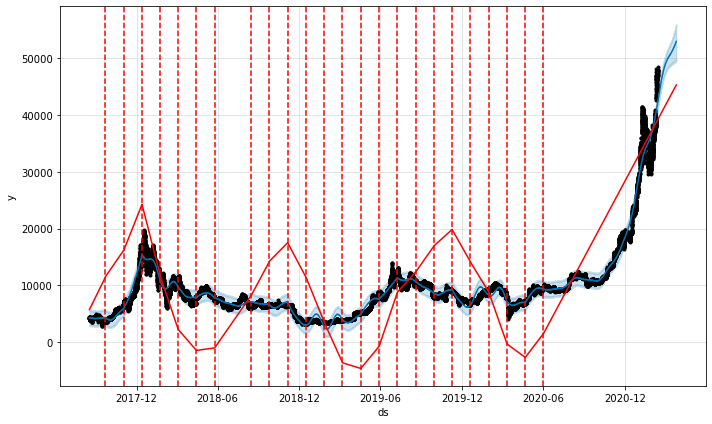

In [21]:
# plot forecast as usual
# YOUR CODE HERE!

# add change points to plot; by default changepoints are only inferred for the first 80% of data to avoid overfitting,
# but this can be changed by using the changepoint_range argument of the model
# YOUR CODE HERE!

In [22]:
# print datetime of detected changepoints 
# YOUR CODE HERE!

984     2017-09-22 05:00:00
1968    2017-11-02 05:00:00
2952    2017-12-13 05:00:00
3936    2018-01-23 05:00:00
4919    2018-03-04 00:00:00
5903    2018-04-14 00:00:00
6887    2018-05-25 00:00:00
7871    2018-07-05 07:00:00
8855    2018-08-15 00:00:00
9839    2018-09-25 00:00:00
10823   2018-11-05 00:00:00
11807   2018-12-16 00:00:00
12790   2019-01-25 23:00:00
13774   2019-03-07 23:00:00
14758   2019-04-17 23:00:00
15742   2019-05-28 23:00:00
16726   2019-07-08 23:00:00
17710   2019-08-18 23:00:00
18694   2019-09-28 23:00:00
19678   2019-11-08 23:00:00
20661   2019-12-19 22:00:00
21645   2020-01-29 22:00:00
22629   2020-03-10 22:00:00
23613   2020-04-20 22:00:00
24597   2020-05-31 22:00:00
Name: ds, dtype: datetime64[ns]